<a href="https://colab.research.google.com/github/urosgodnov/BigData/blob/master/Merged_Pandas_Scikit_Learn_Notebook_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
BT=pd.read_csv("https://raw.githubusercontent.com/urosgodnov/datasets/master/BT.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
BT.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,...,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,...,0,0,1,1
1,1021,1,0.5,1,...,1,1,0,2
2,563,1,0.5,1,...,1,1,0,2
3,615,1,2.5,0,...,1,0,0,2
4,1821,1,1.2,0,...,1,1,0,1


In [ ]:
movie=pd.read_csv("/content/gdrive/MyDrive/Pandas_data/movie.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Recipes
* [Dissecting the anatomy of a DataFrame](#Dissecting-the-anatomy-of-a-DataFrame)
* [Accessing the main DataFrame components](#Accessing-the-main-DataFrame-components)
* [Understanding data types](#Understanding-data-types)
* [Selecting a single Series](#Selecting-a-single-Series)
* [Calling Series methods](#Calling-Series-methods)
* [Working with operators on a Series](#Working-with-operators-on-a-Series)
* [Chaining Series methods together](#Chaining-Series-methods-together)
* [Making a meaningful index](#Making-a-meaningful-index)
* [Renaming row and column labels](#Renaming-row-and-column-labels)
* [Creating and deleting columns](#Creating-and-deleting-columns)

In [ ]:
movie.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,...,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,...,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,...,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,...,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,...,11000.0,7.5,2.35,10000


In [ ]:
movie.describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4867.0,137.988905,120.239379,1.00,49.00,108.00,191.00,813.0
duration,4901.0,107.090798,25.286015,7.00,93.00,103.00,118.00,511.0
director_facebook_likes,4814.0,691.014541,2832.954125,0.00,7.00,48.00,189.75,23000.0
actor_3_facebook_likes,4893.0,631.276313,1625.874802,0.00,132.00,366.00,633.00,23000.0
actor_1_facebook_likes,4909.0,6494.488491,15106.986884,0.00,607.00,982.00,11000.00,640000.0
...,...,...,...,...,...,...,...,...
title_year,4810.0,2002.447609,12.453977,1916.00,1999.00,2005.00,2011.00,2016.0
actor_2_facebook_likes,4903.0,1621.923516,4011.299523,0.00,277.00,593.00,912.00,137000.0
imdb_score,4916.0,6.437429,1.127802,1.60,5.80,6.60,7.20,9.5
aspect_ratio,4590.0,2.222349,1.402940,1.18,1.85,2.35,2.35,16.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie.skew()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-117-ae19525ec0b2>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  movie.skew()


num_critic_for_reviews      1.545198
duration                    2.357977
director_facebook_likes     5.205766
actor_3_facebook_likes      7.441520
actor_1_facebook_likes     19.276023
                             ...    
title_year                 -2.320340
actor_2_facebook_likes     10.253221
imdb_score                 -0.740408
aspect_ratio                9.277084
movie_facebook_likes        5.177099
Length: 16, dtype: float64

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## change options for each recipe

In [ ]:
report=sv.analyze(movie)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:325: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot


In [ ]:
report.show_html("movie_EDA_report.html")

Report movie_EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)

In [ ]:
#uploaded = files.upload()
from google.colab import files

# Dissecting the anatomy of a DataFrame

In [ ]:
uploaded=files.upload()

Saving movie.csv to movie.csv


In [ ]:
movie=pd.read_csv('/content/gdrive/MyDrive/Pandas_data/movie.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 13.4 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

In [ ]:
report=sv.analyze(movie)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
report.show_html('movieEDA.html')

Report movieEDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Accessing the main DataFrame components

In [ ]:
columns = movie.columns
index = movie.index
data = movie.values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
for column in columns:
  if column[0]=="g":
    print(column)

gross
genres


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RangeIndex(start=0, stop=4916, step=1)

In [ ]:
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [ ]:
issubclass(pd.RangeIndex, pd.Index)

## There's more

In [ ]:
index.values

In [ ]:
columns.values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

# Understanding data types

In [ ]:
movie.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


color                       object
director_name               object
num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
                            ...   
title_year                 float64
actor_2_facebook_likes     float64
imdb_score                 float64
aspect_ratio               float64
movie_facebook_likes         int64
Length: 28, dtype: object

In [ ]:
movie["director_name"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        16
                    ..
John Putch           1
Luca Guadagnino      1
Sam Fell             1
Dan Fogelman         1
Daniel Hsia          1
Name: director_name, Length: 2397, dtype: int64

# Selecting a single Series

In [ ]:
movie['director_name'].to_frame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker
...,...
4911,Scott Smith
4912,NaN
4913,Benjamin Roberds
4914,Daniel Hsia


In [ ]:
type(movie['director_name'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

# There's more

In [ ]:
director = movie['director_name'] # save Series to variable
director.name

'director_name'

In [ ]:
director.to_frame().head(10)

,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker
5,Andrew Stanton
6,Sam Raimi
7,Nathan Greno
8,Joss Whedon
9,David Yates


# Calling Series methods

## Getting ready...

In [ ]:
s_attr_methods = set(dir(pd.Series))
(s_attr_methods)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '_

In [ ]:
df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

In [ ]:
len(s_attr_methods & df_attr_methods)

## How to do it...

In [ ]:
director = movie['director_name']
actor_1_fb_likes = movie['actor_1_facebook_likes']

In [ ]:
director.head()

In [ ]:
actor_1_fb_likes.head()

In [ ]:
with pd.option_context('display.max_rows', 8):
    display(director.value_counts())

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
                    ..
Luca Guadagnino      1
Sam Fell             1
Dan Fogelman         1
Daniel Hsia          1
Name: director_name, Length: 2397, dtype: int64

In [ ]:
director.size

4916

In [ ]:
movie.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4916, 28)

In [ ]:
movie.shape

(4916, 28)

In [ ]:
len(director)

In [ ]:
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4867.0,137.988905,120.239379,1.00,49.00,108.00,191.00,813.0
duration,4901.0,107.090798,25.286015,7.00,93.00,103.00,118.00,511.0
director_facebook_likes,4814.0,691.014541,2832.954125,0.00,7.00,48.00,189.75,23000.0
actor_3_facebook_likes,4893.0,631.276313,1625.874802,0.00,132.00,366.00,633.00,23000.0
actor_1_facebook_likes,4909.0,6494.488491,15106.986884,0.00,607.00,982.00,11000.00,640000.0
...,...,...,...,...,...,...,...,...
title_year,4810.0,2002.447609,12.453977,1916.00,1999.00,2005.00,2011.00,2016.0
actor_2_facebook_likes,4903.0,1621.923516,4011.299523,0.00,277.00,593.00,912.00,137000.0
imdb_score,4916.0,6.437429,1.127802,1.60,5.80,6.60,7.20,9.5
aspect_ratio,4590.0,2.222349,1.402940,1.18,1.85,2.35,2.35,16.0


In [ ]:
director.count()

In [ ]:
actor_1_fb_likes.count()

4909

In [ ]:
actor_1_fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
director.isnull(). \
         sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


102

In [ ]:
actor_1_fb_likes. \
          isnull(). \
          sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [ ]:
actor_1_fb_likes_filled = actor_1_fb_likes.fillna(0)
actor_1_fb_likes_filled.count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4916

In [ ]:
actor_1_fb_likes_filled. \
          isnull(). \
          sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
actor_1_fb_likes_dropped = actor_1_fb_likes.dropna()
actor_1_fb_likes_dropped.size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4909

## There's more...

In [ ]:
director.value_counts(normalize=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Steven Spielberg    0.005401
Woody Allen         0.004570
Martin Scorsese     0.004155
Clint Eastwood      0.004155
Ridley Scott        0.003324
                      ...   
John Putch          0.000208
Luca Guadagnino     0.000208
Sam Fell            0.000208
Dan Fogelman        0.000208
Daniel Hsia         0.000208
Name: director_name, Length: 2397, dtype: float64

In [ ]:
director.hasnans

In [ ]:
director.notnull()

In [ ]:
director.describe()

# Working with operators on a Series

In [ ]:

imdb_score = movie['imdb_score']
imdb_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
       ... 
4911    7.7
4912    7.5
4913    6.3
4914    6.3
4915    6.6
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score + 1

0       8.9
1       8.1
2       7.8
3       9.5
4       8.1
       ... 
4911    8.7
4912    8.5
4913    7.3
4914    7.3
4915    7.6
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score * 2.5

0       19.75
1       17.75
2       17.00
3       21.25
4       17.75
        ...  
4911    19.25
4912    18.75
4913    15.75
4914    15.75
4915    16.50
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score // 7

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4911    1.0
4912    1.0
4913    0.0
4914    0.0
4915    0.0
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score > 7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        True
1        True
2       False
3        True
4        True
        ...  
4911     True
4912     True
4913    False
4914    False
4915    False
Name: imdb_score, Length: 4916, dtype: bool

In [ ]:
imdb_score[imdb_score > 7].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1546

In [ ]:
director = movie['director_name']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
director == 'James Cameron'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        True
1       False
2       False
3       False
4       False
        ...  
4911    False
4912    False
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

In [ ]:
movie.to_excel("Exported_movie_without_index.xlsx", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## There's more...

In [ ]:
imdb_score.add(1)              # imdb_score + 1

In [ ]:
imdb_score.mul(2.5)            # imdb_score * 2.5

In [ ]:
imdb_score.floordiv(7)         # imdb_score // 7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

In [ ]:
movie[imdb_score.gt(7)]               # imdb_score > 7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0
7,Color,Nathan Greno,324.0,100.0,...,553.0,7.8,1.85,29000
...,...,...,...,...,...,...,...,...,...
4900,Color,Jafar Panahi,64.0,90.0,...,0.0,7.5,1.85,697
4902,Color,Kiyoshi Kurosawa,78.0,111.0,...,13.0,7.4,1.85,817
4909,Color,Anthony Vallone,NaN,84.0,...,44.0,7.8,NaN,4
4911,Color,Scott Smith,1.0,87.0,...,470.0,7.7,NaN,84


In [ ]:
director.eq('James Cameron')   # director == 'James Cameron'

In [ ]:
imdb_score.astype(int).mod(5)

# Chaining Series methods together

In [ ]:
#movied=pd.read_csv(io.BytesIO(uploaded['movie.csv']))
actor_1_fb_likes = movie['actor_1_facebook_likes']
director = movie['director_name']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
actor_1_fb_likes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        1000.0
1       40000.0
2       11000.0
3       27000.0
4         131.0
         ...   
4911      637.0
4912      841.0
4913        0.0
4914      946.0
4915       86.0
Name: actor_1_facebook_likes, Length: 4916, dtype: float64

In [ ]:
actor_1_fb_likes.isnull().\
                    sum()

7

In [ ]:
actor_1_fb_likes.dtype

dtype('float64')

In [ ]:
actor_1_fb_likes.fillna(0)\
                .astype(int)\
                .head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int64

## There's more...

In [ ]:
actor_1_fb_likes.isnull().mean()

In [ ]:
(actor_1_fb_likes.fillna(0)
                 .astype(int)
                 .head())

# Making a meaningful index

In [ ]:
movie = pd.read_csv('content/drive/data/movie.csv', sep=";")

In [ ]:
movie.head().to_excel("DummyExcel_withoutindex.xlsx", index=False)

In [ ]:
movie2 = movie.set_index('movie_title')
movie2

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,Color,Scott Smith,1.0,87.0,...,470.0,7.7,NaN,84
The Following,Color,NaN,43.0,43.0,...,593.0,7.5,16.00,32000
A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,...,0.0,6.3,NaN,16


In [ ]:
movie=pd.read_csv('/content/gdrive/MyDrive/Pandas_data/movie.csv', index_col='movie_title')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,Color,Scott Smith,1.0,87.0,...,470.0,7.7,NaN,84
The Following,Color,NaN,43.0,43.0,...,593.0,7.5,16.00,32000
A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,...,0.0,6.3,NaN,16


# There's more...

In [ ]:
movie.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movie_title,color,director_name,num_critic_for_reviews,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Avatar,Color,James Cameron,723.0,...,936.0,7.9,1.78,33000
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,...,5000.0,7.1,2.35,0
2,Spectre,Color,Sam Mendes,602.0,...,393.0,6.8,2.35,85000
3,The Dark Knight Rises,Color,Christopher Nolan,813.0,...,23000.0,8.5,2.35,164000
4,Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,...,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...
4911,Signed Sealed Delivered,Color,Scott Smith,1.0,...,470.0,7.7,NaN,84
4912,The Following,Color,NaN,43.0,...,593.0,7.5,16.00,32000
4913,A Plague So Pleasant,Color,Benjamin Roberds,13.0,...,0.0,6.3,NaN,16
4914,Shanghai Calling,Color,Daniel Hsia,14.0,...,719.0,6.3,2.35,660


# Renaming row and column labels

In [ ]:
#movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [ ]:
#indexes_renamed = {'Avatar':'Ratava', 'Spectre': 'Ertceps'}
columns_renamed = {'director_name':'Director Name',
                       'num_critic_for_reviews': 'Critical Reviews'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie_renamed=movie.rename(columns=columns_renamed)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pyjanitor

In [ ]:
import janitor

In [ ]:
movie_renamed.clean_names()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,color,director_name,critical_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,Color,Scott Smith,1.0,87.0,...,470.0,7.7,NaN,84
The Following,Color,NaN,43.0,43.0,...,593.0,7.5,16.00,32000
A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,...,0.0,6.3,NaN,16


In [ ]:
movie_renamed.clean_names()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,color,director_name,critical_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


# There's more

In [ ]:
movie = pd.read_csv(io.BytesIO(uploaded['movie.csv']), index_col='movie_title')
index = movie.index
columns = movie.columns

index_list = index.tolist()
column_list = columns.tolist()

index_list[0] = 'Ratava'
index_list[2] = 'Ertceps'
column_list[1] = 'Director Name'
column_list[2] = 'Critical Reviews'

In [ ]:
print(index_list[:5])

In [ ]:
print(column_list)

In [ ]:
movie.index = index_list
movie.columns = column_list

In [ ]:
movie.head()

# Creating and deleting columns

In [ ]:
#movie = io.BytesIO(uploaded['movie.csv'])

In [ ]:
movie.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
movie['has_seen'] = 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'has_seen'],
      dtype='object')

In [ ]:
movie.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,color,director_name,num_critic_for_reviews,duration,...,imdb_score,aspect_ratio,movie_facebook_likes,has_seen
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,7.9,1.78,33000,0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,7.1,2.35,0,0
Spectre,Color,Sam Mendes,602.0,148.0,...,6.8,2.35,85000,0
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,8.5,2.35,164000,0
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,7.1,NaN,0,0


In [ ]:
movie['actor_director_facebook_likes'] = (movie['actor_1_facebook_likes'] +
                                              movie['actor_2_facebook_likes'] +
                                              movie['actor_3_facebook_likes'] +
                                              movie['director_facebook_likes'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'has_seen',
       'actor_director_facebook_likes'],
      dtype='object')

In [ ]:
movie.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,color,director_name,num_critic_for_reviews,duration,...,aspect_ratio,movie_facebook_likes,has_seen,actor_director_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,1.78,33000,0,2791.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,2.35,0,0,46563.0
Spectre,Color,Sam Mendes,602.0,148.0,...,2.35,85000,0,11554.0
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,2.35,164000,0,95000.0
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,NaN,0,0,NaN


In [ ]:
movie['actor_director_facebook_likes'].isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


122

In [ ]:
movie['actor_director_facebook_likes'].fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie['is_cast_likes_more'] = (movie['cast_total_facebook_likes'] >=
                                  movie['actor_director_facebook_likes'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
is_cast_likes_more=movie['is_cast_likes_more']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
is_cast_likes_more.astype(int). \
                   head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


movie_title
Avatar                                        1
Pirates of the Caribbean: At World's End      1
Spectre                                       1
The Dark Knight Rises                         1
Star Wars: Episode VII - The Force Awakens    1
Name: is_cast_likes_more, dtype: int64

In [ ]:
movie.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'actor_director_facebook_likes', 'is_cast_likes_more'],
      dtype='object')

In [ ]:
movie['is_cast_likes_more'].all()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False

In [ ]:
movie.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,color,director_name,num_critic_for_reviews,duration,...,aspect_ratio,movie_facebook_likes,actor_director_facebook_likes,is_cast_likes_more
0,Color,James Cameron,723.0,178.0,...,1.78,33000,2791.0,True
1,Color,Gore Verbinski,302.0,169.0,...,2.35,0,46563.0,True
2,Color,Sam Mendes,602.0,148.0,...,2.35,85000,11554.0,True
3,Color,Christopher Nolan,813.0,164.0,...,2.35,164000,95000.0,True
4,NaN,Doug Walker,NaN,NaN,...,NaN,0,0.0,True


In [ ]:
movie = movie.drop('actor_director_facebook_likes', axis='columns')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie['actor_total_facebook_likes'] = (movie['actor_1_facebook_likes'] +
                                       movie['actor_2_facebook_likes'] +
                                       movie['actor_3_facebook_likes'])

movie['actor_total_facebook_likes'].fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie['is_cast_likes_more'] = movie['cast_total_facebook_likes'] >= \
                                  movie['actor_total_facebook_likes']

movie['is_cast_likes_more']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


movie_title
Avatar                                        True
Pirates of the Caribbean: At World's End      True
Spectre                                       True
The Dark Knight Rises                         True
Star Wars: Episode VII - The Force Awakens    True
                                              ... 
Signed Sealed Delivered                       True
The Following                                 True
A Plague So Pleasant                          True
Shanghai Calling                              True
My Date with Drew                             True
Name: is_cast_likes_more, Length: 4916, dtype: bool

In [ ]:
movie.to_excel("movie.xlsx", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie['pct_actor_cast_like'] = (movie['actor_total_facebook_likes'] /
                                movie['cast_total_facebook_likes'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
movie['pct_actor_cast_like'].min(), movie['pct_actor_cast_like'].max()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.0, 1.0)

## There's more...

In [ ]:
movie

In [ ]:
movie

# Chapter 2: pandas Foundations: part 2

## Recipes
* [Selecting multiple DataFrame columns](#Selecting-multiple-DataFrame-columns)
* [Selecting columns with methods](#Selecting-columns-with-methods)
* [Ordering column names sensibly](#Ordering-column-names-sensibly)
* [Operating on the entire DataFrame](#Operating-on-the-entire-DataFrame)
* [Chaining DataFrame methods together](#Chaining-DataFrame-methods-together)
* [Working with operators on a DataFrame](#Working-with-operators-on-a-DataFrame)
* [Transposing the direction of a DataFrame operation](#Transposing-the-direction-of-a-DataFrame-operation)

# Selecting multiple DataFrame columns

In [ ]:
#movie = io.BytesIO(uploaded['movie.csv'])
movie_actor_director = movie[['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']]
movie_actor_director.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,actor_1_name,actor_2_name,actor_3_name,director_name
movie_title,,,,
Avatar,CCH Pounder,Joel David Moore,Wes Studi,James Cameron
Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski
Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes
The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan
Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,Doug Walker


In [ ]:
movie[['director_name']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker


In [ ]:
movie[['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,actor_1_name,actor_2_name,actor_3_name,director_name
0,CCH Pounder,Joel David Moore,Wes Studi,James Cameron
1,Johnny Depp,Orlando Bloom,Jack Davenport,Gore Verbinski
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Sam Mendes
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Christopher Nolan
4,Doug Walker,Rob Walker,NaN,Doug Walker
...,...,...,...,...
4911,Eric Mabius,Daphne Zuniga,Crystal Lowe,Scott Smith
4912,Natalie Zea,Valorie Curry,Sam Underwood,NaN
4913,Eva Boehnke,Maxwell Moody,David Chandler,Benjamin Roberds
4914,Alan Ruck,Daniel Henney,Eliza Coupe,Daniel Hsia


## There's more...

In [ ]:
cols =['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']
movie_actor_director = movie[cols]

# Selecting columns with methods

In [ ]:
movie.select_dtypes(include=['int']).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num_voted_users,cast_total_facebook_likes,movie_facebook_likes,has_seen
movie_title,,,,
Avatar,886204,4834,33000,0
Pirates of the Caribbean: At World's End,471220,48350,0,0
Spectre,275868,11700,85000,0
The Dark Knight Rises,1144337,106759,164000,0
Star Wars: Episode VII - The Force Awakens,8,143,0,0


In [ ]:
movie.select_dtypes(include=['number']).head()

In [ ]:
movie.filter(like='facebook').head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes,movie_facebook_likes,actor_total_facebook_likes
movie_title,,,,,,,
Avatar,0.0,855.0,1000.0,4834,936.0,33000,2791.0
Pirates of the Caribbean: At World's End,563.0,1000.0,40000.0,48350,5000.0,0,46000.0
Spectre,0.0,161.0,11000.0,11700,393.0,85000,11554.0
The Dark Knight Rises,22000.0,23000.0,27000.0,106759,23000.0,164000,73000.0
Star Wars: Episode VII - The Force Awakens,131.0,NaN,131.0,143,12.0,0,0.0


# Ordering column names sensibly

In [ ]:
#movie = pd.read_csv(io.BytesIO(uploaded['movie.csv']))

In [ ]:
movie.head()

In [ ]:
movie.columns

In [ ]:
disc_core = ['movie_title','title_year', 'content_rating','genres']
disc_people = ['director_name','actor_1_name', 'actor_2_name','actor_3_name']
disc_other = ['color','country','language','plot_keywords','movie_imdb_link']
cont_fb = ['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
           'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']
cont_finance = ['budget','gross']
cont_num_reviews = ['num_voted_users','num_user_for_reviews', 'num_critic_for_reviews']
cont_other = ['imdb_score','duration', 'aspect_ratio', 'facenumber_in_poster']

In [ ]:
new_col_order = disc_core + disc_people + disc_other + \
                    cont_fb + cont_finance + cont_num_reviews + cont_other
set(movie.columns) == set(new_col_order)

In [ ]:
movie2 = movie[new_col_order]
movie2.head()

# Operating on the entire DataFrame

In [ ]:
movie.describe()

In [ ]:
pd.options.display.max_rows = 10

In [ ]:
movie.describe(percentiles=[.01, .3, .99])

In [ ]:
pd.options.display.max_rows = 8

In [ ]:
movie.isnull().sum()

## There's more


# Chaining DataFrame methods together

In [ ]:
movie.isnull().head()

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,...,False,False,False,False
1,False,False,False,False,...,False,False,False,False
2,False,False,False,False,...,False,False,False,False
3,False,False,False,False,...,False,False,False,False
4,True,False,True,True,...,False,False,True,False


In [ ]:
movie.isnull().sum().head()

color                       19
director_name              102
num_critic_for_reviews      49
duration                    15
director_facebook_likes    102
dtype: int64

In [ ]:
movie.isnull().sum().sum()

2654

# Working with operators on a DataFrame

## Getting ready...

In [ ]:
uploaded=files.upload()

Saving college.csv to college.csv


In [ ]:
college = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/college.csv',index_col='INSTNM')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
college.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CITY,STABBR,HBCU,MENONLY,...,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,...,0.8284,0.1049,30300,33888
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,...,0.5214,0.2422,39700,21941.5
Amridge University,Montgomery,AL,0.0,0.0,...,0.7795,0.8540,40100,23370
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,...,0.4596,0.2640,45500,24097
Alabama State University,Montgomery,AL,1.0,0.0,...,0.7554,0.1270,26600,33118.5


In [ ]:
college_ugds_ = college.filter(like='UGDS_')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
college_ugds_.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,...,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,...,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,...,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,...,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,...,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,...,0.0006,0.0098,0.0243,0.0137


In [ ]:
college_ugds_.head() + .00501

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03831,0.94031,0.01051,0.00691,0.00741,0.00691,0.00501,0.01091,0.01881
University of Alabama at Birmingham,0.59721,0.26501,0.03331,0.05681,0.00721,0.00571,0.04181,0.02291,0.01501
Amridge University,0.30401,0.42421,0.01191,0.00841,0.00501,0.00501,0.00501,0.00501,0.27651
University of Alabama in Huntsville,0.70381,0.13051,0.04321,0.04261,0.01931,0.00521,0.02221,0.03821,0.04001
Alabama State University,0.02081,0.92581,0.01711,0.00691,0.00601,0.00561,0.01481,0.02931,0.01871


In [ ]:
(college_ugds_.head() + .00501) // .01

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,...,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,3.0,94.0,1.0,0.0,...,0.0,0.0,1.0,1.0
University of Alabama at Birmingham,59.0,26.0,3.0,5.0,...,0.0,4.0,2.0,1.0
Amridge University,30.0,42.0,1.0,0.0,...,0.0,0.0,0.0,27.0
University of Alabama in Huntsville,70.0,13.0,4.0,4.0,...,0.0,2.0,3.0,4.0
Alabama State University,2.0,92.0,1.0,0.0,...,0.0,1.0,2.0,1.0


In [ ]:
college_ugds_op_round = (college_ugds_ + .00501) // .01 / 100
college_ugds_op_round.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03,0.94,0.01,0.00,0.00,0.0,0.00,0.01,0.01
University of Alabama at Birmingham,0.59,0.26,0.03,0.05,0.00,0.0,0.04,0.02,0.01
Amridge University,0.30,0.42,0.01,0.00,0.00,0.0,0.00,0.00,0.27
University of Alabama in Huntsville,0.70,0.13,0.04,0.04,0.01,0.0,0.02,0.03,0.04
Alabama State University,0.02,0.92,0.01,0.00,0.00,0.0,0.01,0.02,0.01


In [ ]:
college_ugds_round = (college_ugds_ + .00001).round(2)
college_ugds_round.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.03,0.94,0.01,0.00,0.00,0.0,0.00,0.01,0.01
University of Alabama at Birmingham,0.59,0.26,0.03,0.05,0.00,0.0,0.04,0.02,0.01
Amridge University,0.30,0.42,0.01,0.00,0.00,0.0,0.00,0.00,0.27
University of Alabama in Huntsville,0.70,0.13,0.04,0.04,0.01,0.0,0.02,0.03,0.04
Alabama State University,0.02,0.92,0.01,0.00,0.00,0.0,0.01,0.02,0.01


## There's more...

In [ ]:
college_ugds_op_round_methods = college_ugds_.add(.00501).floordiv(.01).div(100)

# Comparing missing values

In [ ]:
np.nan == np.nan

False

In [ ]:
None == None

True

In [ ]:
5 > np.nan

False

In [ ]:
np.nan > 5

False

In [ ]:
5 != np.nan

True

In [ ]:
(college_ugds_ == np.nan).sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
UGDS_AIAN     0
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
dtype: int64

In [ ]:
college_ugds_.isnull().sum()

UGDS_WHITE    661
UGDS_BLACK    661
UGDS_HISP     661
UGDS_ASIAN    661
UGDS_AIAN     661
UGDS_NHPI     661
UGDS_2MOR     661
UGDS_NRA      661
UGDS_UNKN     661
dtype: int64

# Transposing the direction of a DataFrame operation

In [ ]:
college_ugds_ = college.filter(like='UGDS_')
college_ugds_.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [ ]:
college_ugds_.count()

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
UGDS_AIAN     6874
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
dtype: int64

In [ ]:
college_ugds_.count(axis=0)

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
UGDS_AIAN     6874
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
dtype: int64

In [ ]:
college_ugds_.count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
UGDS_AIAN     6874
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
dtype: int64

In [ ]:
college_ugds_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,...,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,...,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,...,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,...,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,...,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,...,0.0006,0.0098,0.0243,0.0137
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN


In [ ]:
college_ugds_.count(axis='columns')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INSTNM
Alabama A & M University                                  9
University of Alabama at Birmingham                       9
Amridge University                                        9
University of Alabama in Huntsville                       9
Alabama State University                                  9
                                                         ..
SAE Institute of Technology  San Francisco                0
Rasmussen College - Overland Park                         0
National Personal Training Institute of Cleveland         0
Bay Area Medical Academy - San Jose Satellite Location    0
Excel Learning Center-San Antonio South                   0
Length: 7535, dtype: int64

In [ ]:
college_ugds_.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN'],
      dtype='object')

In [ ]:
college_ugds_.sum(axis='columns').head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INSTNM
Alabama A & M University               1.0000
University of Alabama at Birmingham    0.9999
Amridge University                     1.0000
University of Alabama in Huntsville    1.0000
Alabama State University               1.0000
dtype: float64

In [ ]:
college_ugds_.isnull().sum(axis=1). \
sort_values(ascending=False). \
head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INSTNM
Excel Learning Center-San Antonio South              9
Western State College of Law at Argosy University    9
Albany Law School                                    9
Albany Medical College                               9
A T Still University of Health Sciences              9
dtype: int64

In [ ]:
college_ugds_ = college_ugds_.dropna(how='all')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
college_ugds_.ge(.15).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,...,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,False,True,False,False,...,False,False,False,False
University of Alabama at Birmingham,True,True,False,False,...,False,False,False,False
Amridge University,True,True,False,False,...,False,False,False,True
University of Alabama in Huntsville,True,False,False,False,...,False,False,False,False
Alabama State University,False,True,False,False,...,False,False,False,False


In [ ]:
diversity_metric = college_ugds_.ge(.15).sum(axis='columns')
diversity_metric.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INSTNM
Alabama A & M University               1
University of Alabama at Birmingham    2
Amridge University                     3
University of Alabama in Huntsville    1
Alabama State University               1
dtype: int64

In [ ]:
college_ugds_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,...,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,...,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,...,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,...,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,...,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,...,0.0006,0.0098,0.0243,0.0137
...,...,...,...,...,...,...,...,...,...
SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN


In [ ]:
diversity_metric.value_counts()

1    3042
2    2884
3     876
4      63
0       7
5       2
dtype: int64

In [ ]:
diversity_metric.sort_values(ascending=False).head()

INSTNM
Central Texas Beauty College-Temple                               5
Regency Beauty Institute-Austin                                   5
Westwood College-O'Hare Airport                                   4
Regency Beauty Institute-Pasadena                                 4
Soma Institute-The National School of Clinical Massage Therapy    4
dtype: int64

In [ ]:
college_ugds_.loc[['Regency Beauty Institute-Austin',
                          'Central Texas Beauty College-Temple']]

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,...,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Regency Beauty Institute-Austin,0.1867,0.2133,0.1600,0.0000,...,0.0,0.1733,0.0,0.2667
Central Texas Beauty College-Temple,0.1616,0.2323,0.2626,0.0202,...,0.0,0.1717,0.0,0.1515


In [ ]:
us_news_top = ['Rutgers University-Newark',
               'Andrews University',
               'Stanford University',
               'University of Houston',
               'University of Nevada-Las Vegas']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
diversity_metric.loc[us_news_top]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INSTNM
Rutgers University-Newark         4
Andrews University                3
Stanford University               3
University of Houston             3
University of Nevada-Las Vegas    3
dtype: int64

In [ ]:
college_ugds_.loc

UGDS_WHITE    1.0
UGDS_BLACK    0.0
UGDS_HISP     0.0
UGDS_ASIAN    0.0
UGDS_AIAN     0.0
UGDS_NHPI     0.0
UGDS_2MOR     0.0
UGDS_NRA      0.0
UGDS_UNKN     0.0
Name: Talmudical Seminary Oholei Torah, dtype: float64

# Chapter 3: Beginning Data Analysis

## Recipes
* [Developing a data analysis routine](#Developing-a-data-analysis-routine)
* [Reducing memory by changing data types](#Reducing-memory-by-changing-data-types)
* [Selecting the smallest of the largest](#Selecting-the-smallest-of-the-largest)
* [Selecting the largest of each group by sorting](#Selecting-the-largest-of-each-group-by-sorting)
* [Duplicating nlargest with sort_values](#Duplicating-nlargest-with-sort_values)
* [Calculating a trailing stop order price](#Calculating-a-trailing-stop-order-price)

# Developing a data analysis routine

In [ ]:
college=pd.read_csv("/content/gdrive/MyDrive/Pandas_data/college.csv")

In [ ]:
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [ ]:
college.shape

(7535, 27)

In [ ]:
# changing the behavior of describe to show categorical values
# showing statistics for a certain type of a column/ number, float, int,...
college.describe(include=[np.object, pd.Categorical])

,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
count,7535,7535,7535,6413,7503
unique,7535,2514,59,598,2038
top,Alabama A & M University,New York,CA,PrivacySuppressed,PrivacySuppressed
freq,1,87,773,822,1510


In [ ]:
college.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


In [ ]:
college.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.000000e+00
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.000000e+00
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.000000e+00
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.000000e+00
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,7.650000e+02
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,7.850000e+02
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.000000e+00
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,1.515580e+05
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.000000e+00
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.000000e+00


In [ ]:
college['RELAFFIL'] = college['RELAFFIL'].astype(np.int8)

In [ ]:
college.describe(include=['int', 'float']).T  # defaults to 64 bit int/floats

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.000000e+00
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.000000e+00
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.000000e+00
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,7.650000e+02
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,7.850000e+02
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.000000e+00
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,1.515580e+05
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.000000e+00
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.000000e+00
UGDS_HISP,6874.0,0.161635,0.221854,0.0,0.027600,0.07140,0.198875,1.000000e+00


In [ ]:
college.describe(include=['number']).T  # also works as the default int/float are 64 bits

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.000000e+00
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.000000e+00
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.000000e+00
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.000000e+00
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,7.650000e+02
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,7.850000e+02
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.000000e+00
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,1.515580e+05
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.000000e+00
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.000000e+00


# Selecting DataFrame rows

In [ ]:
college.iloc[60]

CITY                  Anchorage
STABBR                       AK
HBCU                          0
                        ...    
UG25ABV                  0.4386
MD_EARN_WNE_P10           42500
GRAD_DEBT_MDN_SUPP      19449.5
Name: University of Alaska Anchorage, Length: 26, dtype: object

In [ ]:
college.loc['University of Alaska Anchorage']

CITY                  Anchorage
STABBR                       AK
HBCU                          0
                        ...    
UG25ABV                  0.4386
MD_EARN_WNE_P10           42500
GRAD_DEBT_MDN_SUPP      19449.5
Name: University of Alaska Anchorage, Length: 26, dtype: object

In [ ]:
college.iloc[[60, 99, 3]]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,12865.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097


In [ ]:
labels = ['University of Alaska Anchorage',
          'International Academy of Hair Design',
          'University of Alabama in Huntsville']
college.loc[labels]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
University of Alaska Anchorage,Anchorage,AK,0.0,0.0,0.0,0,NaN,NaN,0.0,12865.0,...,0.0980,0.0181,0.0457,0.4539,1,0.2385,0.2647,0.4386,42500,19449.5
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097


In [ ]:
college.iloc[99:102]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
GateWay Community College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,5211.0,...,0.0127,0.0161,0.0702,0.7465,1,0.3270,0.2189,0.5832,29800,7283
Mesa Community College,Mesa,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,19055.0,...,0.0205,0.0257,0.0682,0.6457,1,0.3423,0.2207,0.4010,35200,8000


In [ ]:
start = 'International Academy of Hair Design'
stop = 'Mesa Community College'
college.loc[start:stop]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
International Academy of Hair Design,Tempe,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,188.0,...,0.0160,0.0000,0.0638,0.0000,0,0.7185,0.7346,0.3905,22200,10556
GateWay Community College,Phoenix,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,5211.0,...,0.0127,0.0161,0.0702,0.7465,1,0.3270,0.2189,0.5832,29800,7283
Mesa Community College,Mesa,AZ,0.0,0.0,0.0,0,NaN,NaN,0.0,19055.0,...,0.0205,0.0257,0.0682,0.6457,1,0.3423,0.2207,0.4010,35200,8000


# There's more...

In [ ]:
college.iloc[[60, 99, 3]].index.tolist()

['University of Alaska Anchorage',
 'International Academy of Hair Design',
 'University of Alabama in Huntsville']

# Selecting DataFrame rows and columns simultaneously

In [ ]:
college.iloc[:3, :4]

,CITY,STABBR,HBCU,MENONLY
INSTNM,,,,
Alabama A & M University,Normal,AL,1.0,0.0
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0
Amridge University,Montgomery,AL,0.0,0.0


In [ ]:
college.loc[:'Amridge University', :'MENONLY']

,CITY,STABBR,HBCU,MENONLY
INSTNM,,,,
Alabama A & M University,Normal,AL,1.0,0.0
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0
Amridge University,Montgomery,AL,0.0,0.0


In [ ]:
college.iloc[:, [4,6]].head()

,WOMENONLY,SATVRMID
INSTNM,,
Alabama A & M University,0.0,424.0
University of Alabama at Birmingham,0.0,570.0
Amridge University,0.0,NaN
University of Alabama in Huntsville,0.0,595.0
Alabama State University,0.0,425.0


In [ ]:
college.loc[:, ['WOMENONLY', 'SATVRMID']]

In [ ]:
college.iloc[[100, 200], [7, 15]]

,SATMTMID,UGDS_NHPI
INSTNM,,
GateWay Community College,NaN,0.0029
American Baptist Seminary of the West,NaN,NaN


In [ ]:
rows = ['GateWay Community College', 'American Baptist Seminary of the West']
columns = ['SATMTMID', 'UGDS_NHPI']
college.loc[rows, columns]

,SATMTMID,UGDS_NHPI
INSTNM,,
GateWay Community College,NaN,0.0029
American Baptist Seminary of the West,NaN,NaN


In [ ]:
college = college.sort_index()

In [ ]:
college.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
A & W Healthcare Educators,New Orleans,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,40.0,...,0.0000,0.0000,0.0000,0.1250,1,0.7018,0.8596,0.6667,NaN,19022.5
A T Still University of Health Sciences,Kirksville,MO,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,219800,PrivacySuppressed
ABC Beauty Academy,Garland,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,30.0,...,0.0000,0.0000,0.0000,0.0000,0,0.7857,0.0000,0.8286,NaN,PrivacySuppressed
ABC Beauty College Inc,Arkadelphia,AR,0.0,0.0,0.0,0,NaN,NaN,0.0,38.0,...,0.0000,0.0000,0.0000,0.2105,1,0.9815,1.0000,0.4688,PrivacySuppressed,16500
AI Miami International University of Art and Design,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,2778.0,...,0.0018,0.0025,0.4644,0.2185,1,0.5507,0.6966,0.3262,29900,31000


# Boolean Indexing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

%matplotlib inline

# Calculating boolean statistics

In [ ]:
pd.options.display.max_columns = 50

In [ ]:
movie = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [ ]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [ ]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [ ]:
movie_2_hours.value_counts() / movie_2_hours.size

False    0.788649
True     0.211351
Name: duration, dtype: float64

# Constructing multiple boolean conditions

In [ ]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.title_year < 2000) | (movie.title_year >= 2010)

criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [ ]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

# Filtering with boolean indexing

In [ ]:


crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = criteria1 & criteria2 & criteria3

In [ ]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [ ]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [ ]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,Bradley Cooper,682155,32438,Djimon Hounsou,3.0,bounty hunter|outer space|raccoon|talking anim...,http://www.imdb.com/title/tt2015381/?ref_=fn_t...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,Matthew McConaughey,928227,31488,Mackenzie Foy,1.0,black hole|father daughter relationship|saving...,http://www.imdb.com/title/tt0816692/?ref_=fn_t...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [ ]:
movie_filtered = movie.loc[final_crit_all, ['imdb_score', 'content_rating', 'title_year']]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


# Replicating boolean indexing with index selection

In [ ]:
college = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/college.csv')
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [ ]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


## There's more...

In [ ]:
states =['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)]
college2.loc[states].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


# Gaining perspective on stock prices

In [ ]:
slb = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [ ]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [ ]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

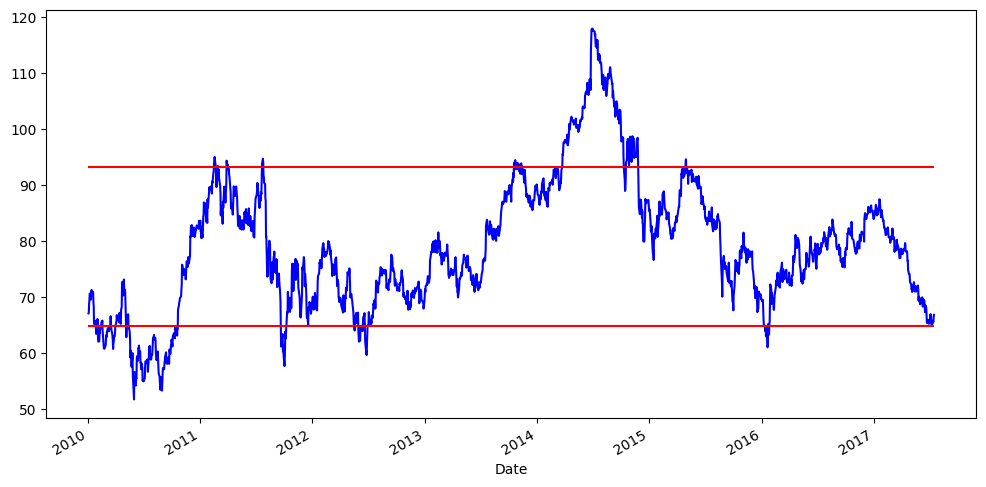

In [ ]:
import matplotlib.pyplot as plt
slb_close.plot(color='b', figsize=(12,6))

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='r')

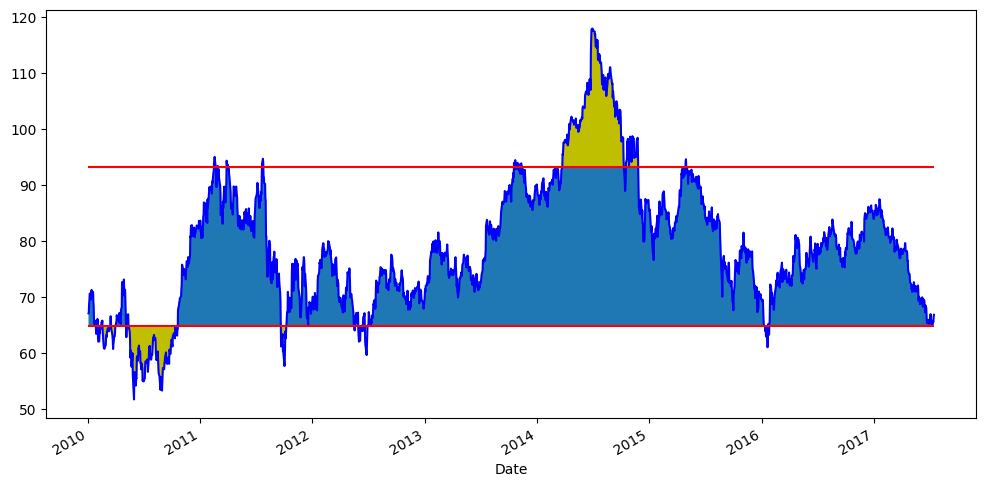

In [ ]:
slb_close.plot(color='b', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='r')
plt.fill_between(criteria.index, lower_10, slb_close.values)
plt.fill_between(criteria.index, lower_10, slb_close.values, where= slb_close < lower_10, color='y')
plt.fill_between(criteria.index, upper_10, slb_close.values, where= slb_close > upper_10, color='y')

# Translating SQL WHERE clauses

In [ ]:
employee = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/employee.csv')

In [ ]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [ ]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int64

In [ ]:
criteria_dept = employee.DEPARTMENT.isin(['Houston Police Department-HPD', 'Houston Fire Department (HFD)'])
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [ ]:
criteria_final = criteria_dept & criteria_gender & criteria_sal

In [ ]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


# Improving readability of boolean indexing with the query method

In [ ]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [ ]:
query_string = "DEPARTMENT in @depts " \
               "and GENDER == 'Female' " \
               "and 80000 <= BASE_SALARY <= 120000"

emp_filtered = employee.query(query_string)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


# There's more...

In [ ]:
top10_depts = employee.DEPARTMENT.value_counts().index[:10].tolist()
employee_filtered2 = employee.query("DEPARTMENT not in @top10_depts and GENDER == 'Female'")
employee_filtered2[['DEPARTMENT', 'GENDER']].head()

,DEPARTMENT,GENDER
0,Municipal Courts Department,Female
73,Human Resources Dept.,Female
96,City Controller's Office,Female
117,Legal Department,Female
146,Houston Information Tech Svcs,Female


# Preserving DataFrames with the where method

In [ ]:
movie = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/movie.csv', index_col='movie_title')
facebook_likes = movie['actor_1_facebook_likes'].dropna()
facebook_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
criteria_high = facebook_likes < 20000
criteria_high.mean()

0.9085353432470972

In [ ]:
facebook_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
facebook_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
criteria_low = facebook_likes > 300
facebook_likes_cap = facebook_likes.where(criteria_high, other=20000)\
                                   .where(criteria_low, 300)
facebook_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

# Highlighting maximum value from each column

In [ ]:
pd.options.display.max_rows = 8

In [ ]:
college = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/college.csv', index_col='INSTNM')
college.dtypes

CITY                   object
STABBR                 object
HBCU                  float64
MENONLY               float64
WOMENONLY             float64
RELAFFIL                int64
SATVRMID              float64
SATMTMID              float64
DISTANCEONLY          float64
UGDS                  float64
UGDS_WHITE            float64
UGDS_BLACK            float64
UGDS_HISP             float64
UGDS_ASIAN            float64
UGDS_AIAN             float64
UGDS_NHPI             float64
UGDS_2MOR             float64
UGDS_NRA              float64
UGDS_UNKN             float64
PPTUG_EF              float64
CURROPER                int64
PCTPELL               float64
PCTFLOAN              float64
UG25ABV               float64
MD_EARN_WNE_P10        object
GRAD_DEBT_MDN_SUPP     object
dtype: object

In [ ]:
college.MD_EARN_WNE_P10.value_counts().head()

PrivacySuppressed    822
38800                151
21500                 97
49200                 78
27400                 46
Name: MD_EARN_WNE_P10, dtype: int64

In [ ]:
college['MD_EARN_WNE_P10'] = pd.to_numeric(college.MD_EARN_WNE_P10, errors='coerce')
college['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(college.GRAD_DEBT_MDN_SUPP, errors='coerce')

In [ ]:
college.dtypes.loc[['MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP']]

MD_EARN_WNE_P10       float64
GRAD_DEBT_MDN_SUPP    float64
dtype: object

In [ ]:
college_numeric = college.select_dtypes(include=[np.number])
college_numeric.head() # only numeric columns

,HBCU,MENONLY,WOMENONLY,...,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,
Alabama A & M University,1.0,0.0,0.0,...,0.1049,30300.0,33888.0
University of Alabama at Birmingham,0.0,0.0,0.0,...,0.2422,39700.0,21941.5
Amridge University,0.0,0.0,0.0,...,0.8540,40100.0,23370.0
University of Alabama in Huntsville,0.0,0.0,0.0,...,0.2640,45500.0,24097.0
Alabama State University,1.0,0.0,0.0,...,0.1270,26600.0,33118.5


In [ ]:
criteria = college_numeric.nunique() == 2
criteria.head()

HBCU          True
MENONLY       True
WOMENONLY     True
RELAFFIL      True
SATVRMID     False
dtype: bool

In [ ]:
binary_cols = college_numeric.columns[criteria].tolist()
binary_cols

['HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'DISTANCEONLY', 'CURROPER']

In [ ]:
college_numeric2 = college_numeric.drop(labels=binary_cols, axis='columns')
college_numeric2.head()

,SATVRMID,SATMTMID,UGDS,...,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,
Alabama A & M University,424.0,420.0,4206.0,...,0.1049,30300.0,33888.0
University of Alabama at Birmingham,570.0,565.0,11383.0,...,0.2422,39700.0,21941.5
Amridge University,NaN,NaN,291.0,...,0.8540,40100.0,23370.0
University of Alabama in Huntsville,595.0,590.0,5451.0,...,0.2640,45500.0,24097.0
Alabama State University,425.0,430.0,4811.0,...,0.1270,26600.0,33118.5


In [ ]:
max_cols = college_numeric2.idxmax()
max_cols

SATVRMID                      California Institute of Technology
SATMTMID                      California Institute of Technology
UGDS                               University of Phoenix-Arizona
UGDS_WHITE                Mr Leon's School of Hair Design-Moscow
                                         ...                    
PCTFLOAN                                  ABC Beauty College Inc
UG25ABV                           Dongguk University-Los Angeles
MD_EARN_WNE_P10                     Medical College of Wisconsin
GRAD_DEBT_MDN_SUPP    Southwest University of Visual Arts-Tucson
Length: 18, dtype: object

In [ ]:
unique_max_cols = max_cols.unique()
unique_max_cols[:5]

array(['California Institute of Technology',
       'University of Phoenix-Arizona',
       "Mr Leon's School of Hair Design-Moscow",
       'Velvatex College of Beauty Culture',
       'Thunderbird School of Global Management'], dtype=object)

In [ ]:
college_numeric2.loc[unique_max_cols].style.highlight_max()

,SATVRMID,SATMTMID,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,
California Institute of Technology,765,785,983,0.2787,0.0153,0.1221,0.4385,0.001,0,0.057,0.0875,0,0,0.1126,0.2303,0.0082,77800,11812.5
University of Phoenix-Arizona,nan,nan,151558,0.3098,0.1555,0.076,0.0082,0.0042,0.005,0.1131,0.0131,0.3152,0,0.6009,0.592,nan,nan,33000
Mr Leon's School of Hair Design-Moscow,nan,nan,16,1,0,0,0,0,0,0,0,0,0,0.625,0.625,0.2,nan,15710
Velvatex College of Beauty Culture,nan,nan,25,0,1,0,0,0,0,0,0,0,0.2,0.7692,0,0.52,nan,nan
Thunderbird School of Global Management,nan,nan,1,0,0,1,0,0,0,0,0,0,1,0,0,0,118900,nan
Cosmopolitan Beauty and Tech School,nan,nan,110,0.0091,0,0.0182,0.9727,0,0,0,0,0,0.3182,0.7761,0.1244,0.9545,nan,nan
Haskell Indian Nations University,430,440,805,0,0,0,0,1,0,0,0,0,0.0224,0.8396,0,0.2089,22800,nan
Palau Community College,nan,nan,602,0,0.0017,0,0,0,0.9983,0,0,0,0.3887,0.856,0,0.2616,24700,nan
LIU Brentwood,nan,nan,15,0,0.1333,0.2667,0,0,0,0.5333,0,0.0667,0.4,0.5652,0.7826,0.7826,44600,25499


In [ ]:
college_numeric2.loc[max_cols.values]

,SATVRMID,SATMTMID,UGDS,...,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,
California Institute of Technology,765.0,785.0,983.0,...,0.0082,77800.0,11812.5
California Institute of Technology,765.0,785.0,983.0,...,0.0082,77800.0,11812.5
University of Phoenix-Arizona,NaN,NaN,151558.0,...,NaN,NaN,33000.0
Mr Leon's School of Hair Design-Moscow,NaN,NaN,16.0,...,0.2000,NaN,15710.0
...,...,...,...,...,...,...,...
ABC Beauty College Inc,NaN,NaN,38.0,...,0.4688,NaN,16500.0
Dongguk University-Los Angeles,NaN,NaN,20.0,...,1.0000,NaN,NaN
Medical College of Wisconsin,NaN,NaN,NaN,...,NaN,233100.0,NaN
Southwest University of Visual Arts-Tucson,NaN,NaN,161.0,...,0.8657,27200.0,49750.0


In [ ]:
flights=pd.read_csv('/content/gdrive/MyDrive/Pandas_data/flights.csv')
flights.groupby('AIRLINE')['ARR_DELAY'].agg(np.mean).head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

In [ ]:
flights.groupby('AIRLINE')['ARR_DELAY'].mean().head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

# Grouping and aggregating with multiple columns and functions

In [ ]:
# The number of cancelled flights for every airline per day weekday
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].agg('sum').head(7)

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
         6          21
         7          29
Name: CANCELLED, dtype: int64

In [ ]:
#Find the number and percentage of cancelled and diverted flights for every airline per weekday
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED', 'DIVERTED'].agg(['sum', 'mean']).head(7)

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
        6              21  0.018667        9  0.008000
        7              29  0.021837        1  0.000753

In [ ]:
# For each origin to destination flight, find the total number of flights,
# the number and percentage of cancelled flights and the average and variance of the airtime.
flights.groupby(['ORG_AIR', 'DEST_AIR']).agg({'CANCELLED': ['sum', 'mean', 'size'],
                                              'AIR_TIME':['mean', 'var']}).head()

CANCELLED              AIR_TIME           
                       sum mean size        mean        var
ORG_AIR DEST_AIR                                           
ATL     ABE              0  0.0   31   96.387097  45.778495
        ABQ              0  0.0   16  170.500000  87.866667
        ABY              0  0.0   19   28.578947   6.590643
        ACY              0  0.0    6   91.333333  11.466667
        AEX              0  0.0   40   78.725000  47.332692

# Removing the MultiIndex after grouping

In [ ]:
airline_info = flights.groupby(['AIRLINE', 'WEEKDAY'])\
                      .agg({'DIST':['sum', 'mean'],
                                    'ARR_DELAY':['min', 'max']}).astype(int)
airline_info.head()

DIST       ARR_DELAY     
                     sum  mean       min  max
AIRLINE WEEKDAY                              
AA      1        1455386  1139       -60  551
        2        1358256  1107       -52  725
        3        1496665  1117       -45  473
        4        1452394  1089       -46  349
        5        1427749  1122       -41  732

In [ ]:
airline_info.reset_index().head(7)

,AIRLINE,WEEKDAY,DIST_sum,DIST_mean,ARR_DELAY_min,ARR_DELAY_max
0,AA,1,1455386,1139,-60,551
1,AA,2,1358256,1107,-52,725
2,AA,3,1496665,1117,-45,473
3,AA,4,1452394,1089,-46,349
4,AA,5,1427749,1122,-41,732
5,AA,6,1265340,1124,-50,858
6,AA,7,1461906,1100,-49,626


# Transforming through a weight-loss

In [ ]:
weight_loss = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/weight_loss.csv')
weight_loss.query('Month == "Jan"')

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283
5,Amy,Jan,Week 3,189
6,Bob,Jan,Week 4,283
7,Amy,Jan,Week 4,190


In [ ]:
def find_perc_loss(s):
    return (s - s.iloc[0]) / s.iloc[0]

In [ ]:
per_weight_loss = weight_loss.groupby(['Name', 'Month'])['Weight'].transform(find_perc_loss)
per_weight_loss.head(8)

0    0.000000
1    0.000000
2   -0.010309
3   -0.040609
4   -0.027491
5   -0.040609
6   -0.027491
7   -0.035533
Name: Weight, dtype: float64

In [ ]:
weight_loss['Perc Weight Loss'] = per_weight_loss.round(3)
weight_loss.query('Name=="Bob" and Month in ["Jan", "Feb"]')

,Name,Month,Week,Weight,Perc Weight Loss
0,Bob,Jan,Week 1,291,0.000
2,Bob,Jan,Week 2,288,-0.010
4,Bob,Jan,Week 3,283,-0.027
6,Bob,Jan,Week 4,283,-0.027
8,Bob,Feb,Week 1,283,0.000
10,Bob,Feb,Week 2,275,-0.028
12,Bob,Feb,Week 3,268,-0.053
14,Bob,Feb,Week 4,268,-0.053


In [ ]:
week4 = weight_loss.query('Week == "Week 4"')
week4

,Name,Month,Week,Weight,Perc Weight Loss
6,Bob,Jan,Week 4,283,-0.027
7,Amy,Jan,Week 4,190,-0.036
14,Bob,Feb,Week 4,268,-0.053
15,Amy,Feb,Week 4,173,-0.089
22,Bob,Mar,Week 4,261,-0.026
23,Amy,Mar,Week 4,170,-0.017
30,Bob,Apr,Week 4,250,-0.042
31,Amy,Apr,Week 4,161,-0.053


In [ ]:
winner = week4.pivot(index='Month', columns='Name', values='Perc Weight Loss')
winner

Name,Amy,Bob
Month,,
Apr,-0.053,-0.042
Feb,-0.089,-0.053
Jan,-0.036,-0.027
Mar,-0.017,-0.026


# Grouping by continuous variables

In [ ]:
flights = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,...,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,...,65.0,0,0
1,1,1,4,...,-13.0,0,0
2,1,1,4,...,35.0,0,0
3,1,1,4,...,-7.0,0,0
4,1,1,4,...,39.0,0,0


In [ ]:
bins = [-np.inf, 200, 500, 1000, 2000, np.inf]
cuts = pd.cut(flights['DIST'], bins=bins)
cuts.head()

0     (500.0, 1000.0]
1    (1000.0, 2000.0]
2     (500.0, 1000.0]
3    (1000.0, 2000.0]
4    (1000.0, 2000.0]
Name: DIST, dtype: category
Categories (5, interval[float64]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 1000.0] < (1000.0, 2000.0] < (2000.0, inf]]

In [ ]:
cuts.value_counts()

(500.0, 1000.0]     20659
(200.0, 500.0]      15874
(1000.0, 2000.0]    14186
(2000.0, inf]        4054
(-inf, 200.0]        3719
Name: DIST, dtype: int64

In [ ]:
flights.groupby(cuts)['AIRLINE'].value_counts(normalize=True).round(3).head(15)

DIST            AIRLINE
(-inf, 200.0]   OO         0.326
                EV         0.289
                MQ         0.211
                DL         0.086
                AA         0.052
                UA         0.027
                WN         0.009
(200.0, 500.0]  WN         0.194
                DL         0.189
                OO         0.159
                EV         0.156
                MQ         0.100
                AA         0.071
                UA         0.062
                VX         0.028
Name: AIRLINE, dtype: float64

# Counting the total number of flights between cities

In [ ]:
flights_count = flights.groupby(['ORG_AIR', 'DEST_AIR']).size()
flights_count.head()

ORG_AIR  DEST_AIR
ATL      ABE         31
         ABQ         16
         ABY         19
         ACY          6
         AEX         40
dtype: int64

In [ ]:
flights_count.loc[[('ATL', 'IAH'), ('IAH', 'ATL')]]

ORG_AIR  DEST_AIR
ATL      IAH         121
IAH      ATL         148
dtype: int64

In [ ]:
flights_sorted = flights[['ORG_AIR', 'DEST_AIR']].apply(sorted, axis=1)
flights_sorted.head()

,ORG_AIR,DEST_AIR
0,LAX,SLC
1,DEN,IAD
2,DFW,VPS
3,DCA,DFW
4,LAX,MCI


In [ ]:
flights_count_ord = flights_sorted.rename(columns={'ORG_AIR':'AIR1', 'DEST_AIR':'AIR2'}) \
                                  .groupby(['AIR1', 'AIR2']) \
                                  .size()
flights_count_ord.head(10)

AIR1  AIR2
ABE   ATL     31
      ORD     24
ABI   DFW     74
ABQ   ATL     16
      DEN     46
      DFW     54
      IAH     26
      LAS     35
      LAX     55
      MSP      9
dtype: int64

In [ ]:
import pandas as pd
import numpy as np

# Tidying variable values as column names with stack

In [ ]:
state_fruit = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/state_fruit.csv', index_col=0)
state_fruit

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [ ]:
state_fruit.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [ ]:
state_fruit_tidy = state_fruit.stack().reset_index()
state_fruit_tidy

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [ ]:
state_fruit_tidy.columns = ['state', 'fruit', 'weight']
state_fruit_tidy

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


# Tidying variable values as column names with melt

In [ ]:
state_fruit2 = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/state_fruit2.csv')
state_fruit2

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [ ]:
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple', 'Orange', 'Banana'])

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [ ]:
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple', 'Orange', 'Banana'],
                 var_name='Fruit',
                 value_name='Weight')

,State,Fruit,Weight
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


# Tidying when two or more values are stored in the same cell

In [ ]:
cities = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/texas_cities.csv')
cities

,City,Geolocation
0,Houston,"29.7604° N, 95.3698° W"
1,Dallas,"32.7767° N, 96.7970° W"
2,Austin,"30.2672° N, 97.7431° W"


In [ ]:
geolocations = cities.Geolocation.str.split(pat='. ', expand=True)
geolocations.columns = ['latitude', 'latitude direction', 'longitude', 'longitude direction']
geolocations

,latitude,latitude direction,longitude,longitude direction
0,29.7604,N,95.3698,W
1,32.7767,N,96.7970,W
2,30.2672,N,97.7431,W


# Tidying when variables are stored in column names and values

In [ ]:
sensors = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/sensors.csv')
sensors

,Group,Property,2012,...,2014,2015,2016
0,A,Pressure,928,...,814,973,870
1,A,Temperature,1026,...,1009,1036,1042
2,A,Flow,819,...,861,882,856
3,B,Pressure,817,...,914,806,942
4,B,Temperature,1008,...,1009,1002,1013
5,B,Flow,887,...,837,824,873


In [ ]:
sensors.melt(id_vars=['Group', 'Property'], var_name='Year').head(6)

,Group,Property,Year,value
0,A,Pressure,2012,928
1,A,Temperature,2012,1026
2,A,Flow,2012,819
3,B,Pressure,2012,817
4,B,Temperature,2012,1008
5,B,Flow,2012,887


In [ ]:
sensors.melt(id_vars=['Group', 'Property'], var_name='Year') \
       .pivot_table(index=['Group', 'Year'], columns='Property', values='value') \
       .reset_index() \
       .rename_axis(None, axis='columns')

,Group,Year,Flow,Pressure,Temperature
0,A,2012,819,928,1026
1,A,2013,806,873,1038
2,A,2014,861,814,1009
3,A,2015,882,973,1036
4,A,2016,856,870,1042
5,B,2012,887,817,1008
6,B,2013,899,877,1041
7,B,2014,837,914,1009
8,B,2015,824,806,1002
9,B,2016,873,942,1013


# Concatenating multiple DataFrames together

In [ ]:
stocks_2016 = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/stocks_2017.csv', index_col='Symbol')

In [ ]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [ ]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [ ]:
s_list = [stocks_2016, stocks_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [5]:
# Example DataFrames
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['B', 'C', 'D'], 'value': [4, 5, 6]})

result = pd.merge(df1, df2, on='key', how='inner')

result

,key,value_x,value_y
0,B,2,4
1,C,3,5


# Chapter 11: Visualization with Matplotlib, Pandas, and Seaborn
## Recipes

* [Getting started with matplotlib](#Getting-started-with-matplotlib)
* [Visualizing data with matplotlib](#Visualizing-data-with-matplotlib)
* [Plotting basics with pandas](#Plotting-basics-with-pandas)
* [Visualizing the flights dataset](#Visualizing-the-flights-dataset)
* [Stacking area charts to discover emerging trends](#Stacking-area-charts-to-discover-emerging-trends)
* [Understanding the differences between seaborn and pandas](#Understanding-the-differences-between-seaborn-and-pandas)
* [Doing multivariate analysis with seaborn grids](#Doing-multivariate-analysis-with-seaborn-grids)
* [Uncovering Simpson's paradox in the diamonds dataset with seaborn](#Uncovering-Simpson's-paradox-in-the-diamonds-dataset-with-seaborn)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Getting started with matplotlib

## Getting Ready

Text(0.5, 1.03, 'Figure Title')

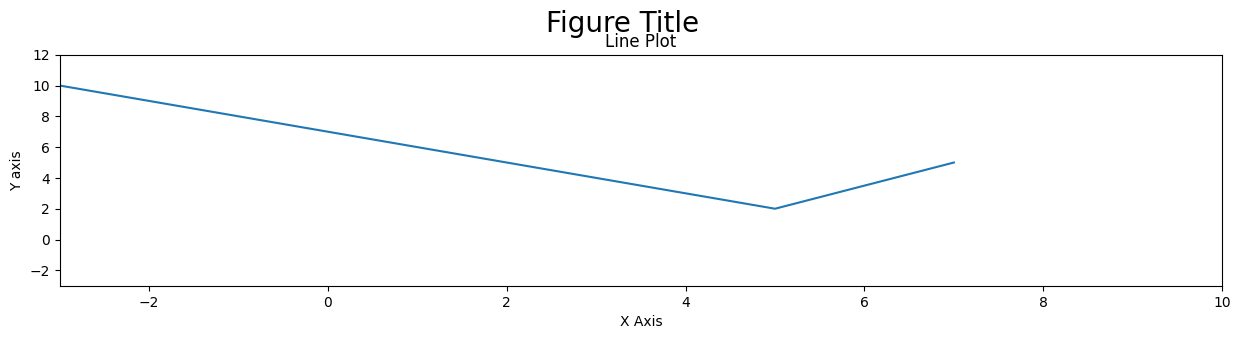

In [10]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(-3, 10)
plt.ylim(-3, 12)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

In [14]:
movie = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [15]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [12]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0, 0.5, 'Millions of Dollars')

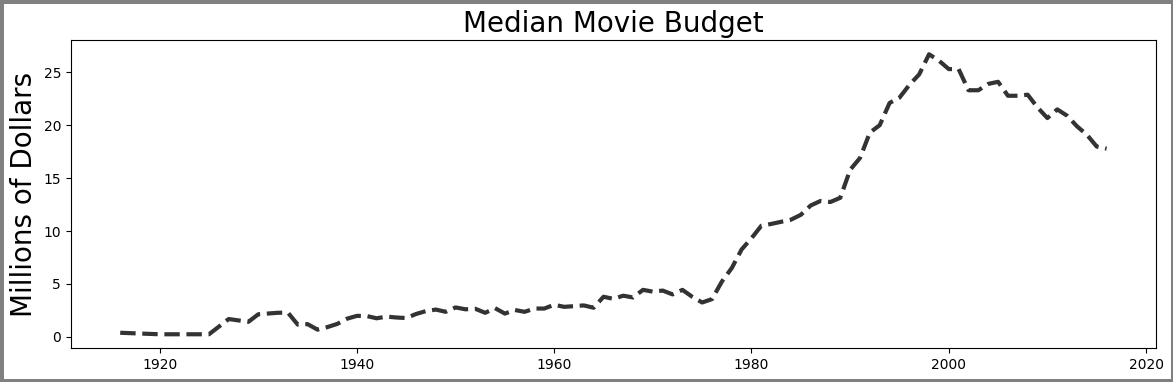

In [16]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

# Plotting basics with pandas

In [24]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'],
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


<Axes: >

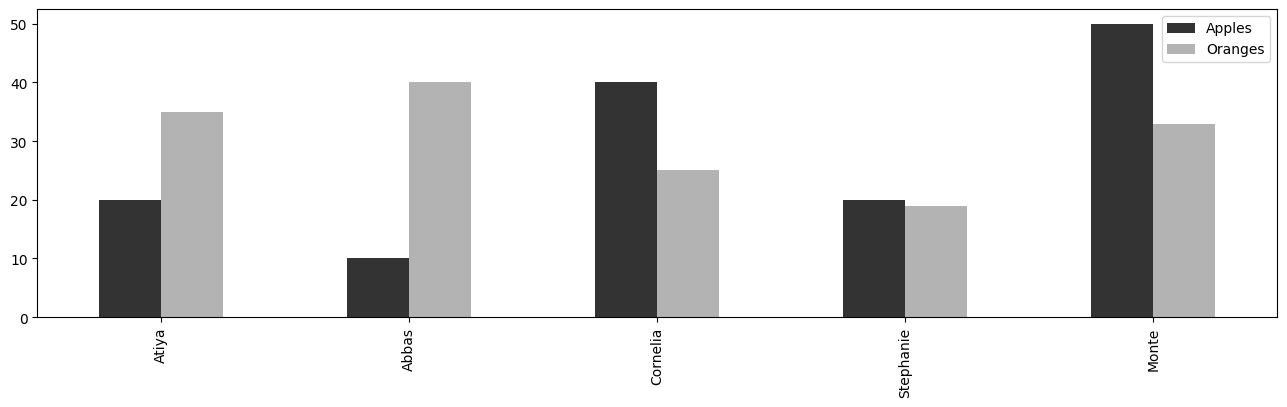

In [25]:
color = ['.2', '.7']
df.plot(kind='bar', color=color, figsize=(16,4))

<Axes: ylabel='Density'>

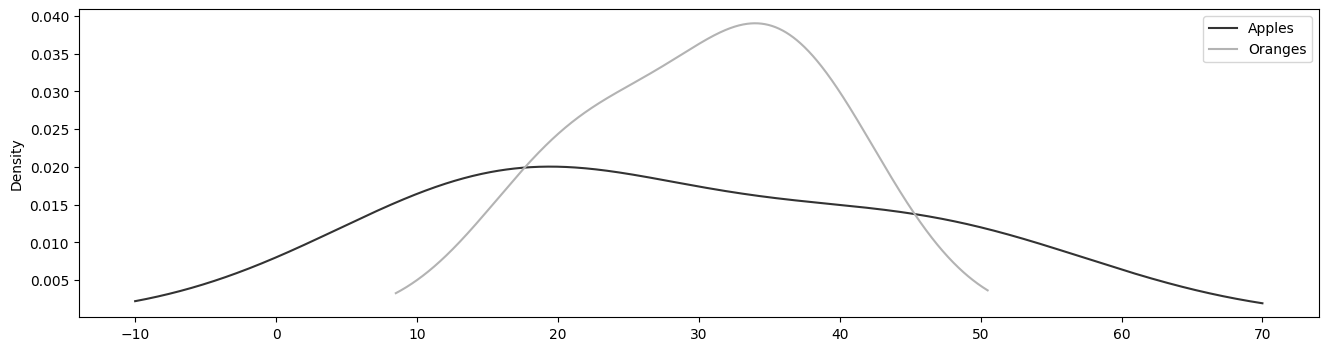

In [22]:
df.plot(kind='kde', color=color, figsize=(16,4))

<Axes: title={'center': 'Histogram'}, ylabel='Frequency'>

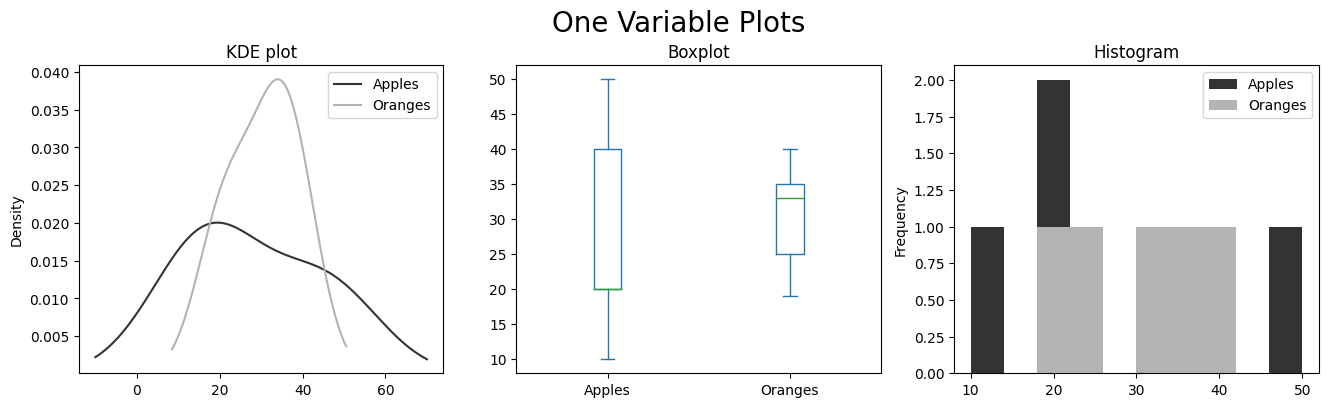

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

# Visualizing the flights dataset

In [28]:
flights = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [29]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

<Axes: title={'center': 'Arrival Delay'}, ylabel='Frequency'>

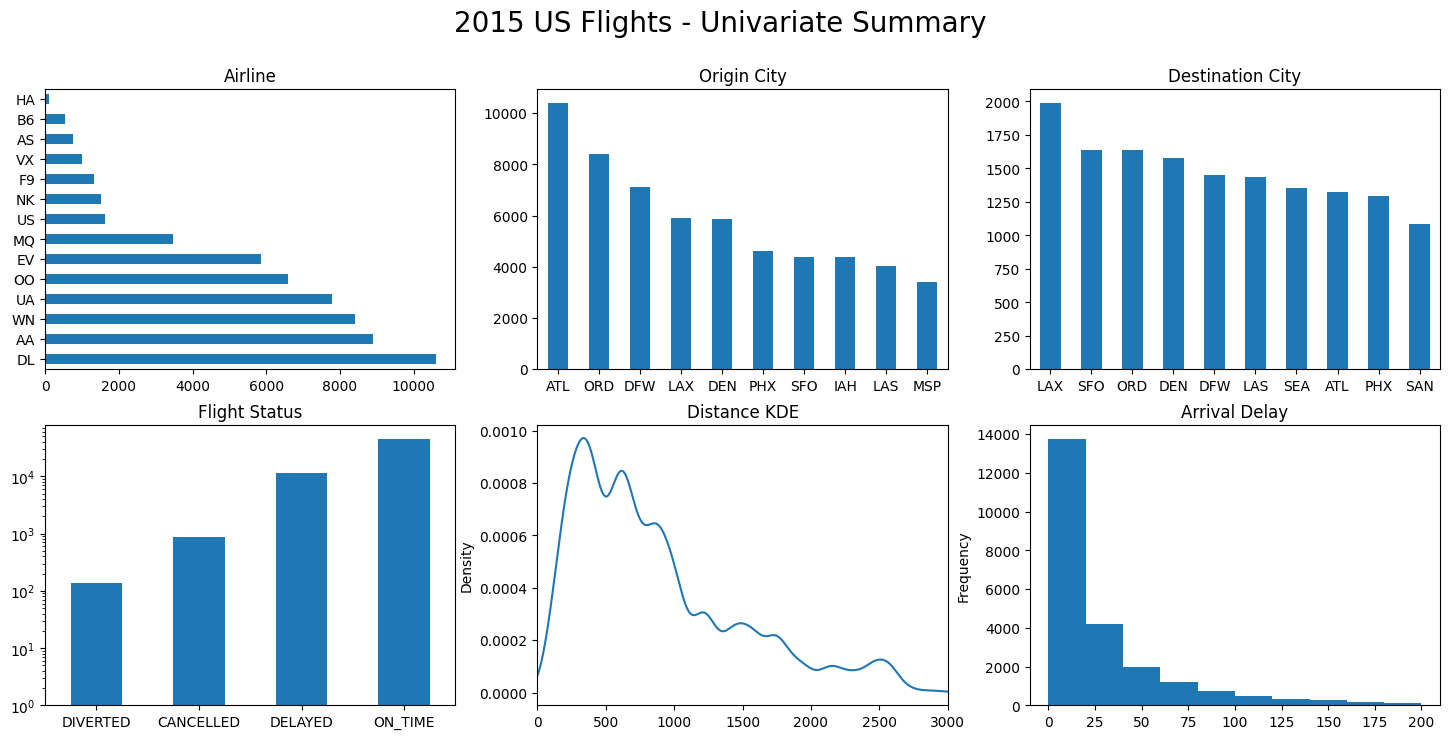

In [30]:
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title ='Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

status.plot(kind='bar', ax=ax4, rot=0, log=True, title='Flight Status')
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000),
                     title='Distance KDE')
flights['ARR_DELAY'].plot(kind='hist', ax=ax6,
                          title='Arrival Delay', range=(0,200))

# Understanding the differences between seaborn and pandas

## Getting ready...

In [ ]:
employee = pd.read_csv('/content/gdrive/MyDrive/Pandas_data/employee.csv',
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,...,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,...,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,...,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,...,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),...,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,...,Active,1989-06-19,1994-10-22


In [ ]:
import seaborn as sns

<Axes: xlabel='count', ylabel='DEPARTMENT'>

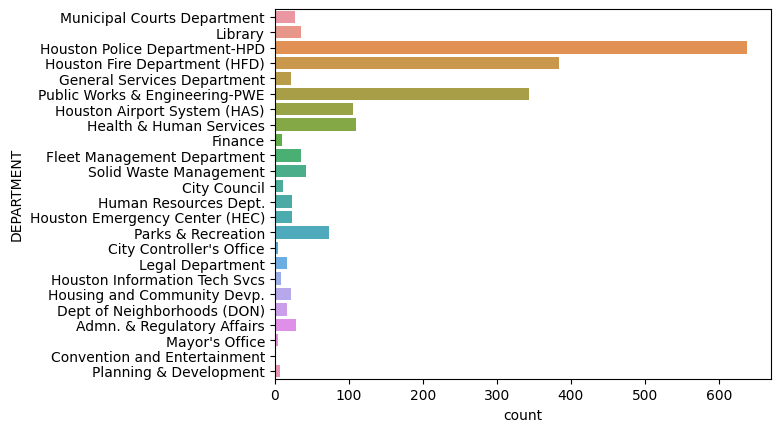

In [ ]:
sns.countplot(y='DEPARTMENT', data=employee)

In [ ]:
employee['DEPARTMENT'].value_counts().plot('barh')

TypeError: ignored

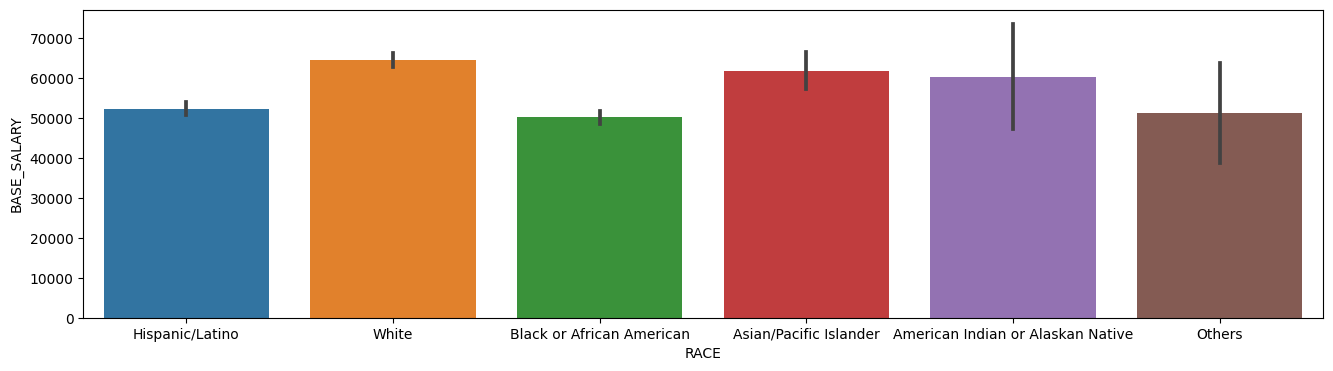

In [ ]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(16, 4)

Text(0, 0.5, 'Mean Salary')

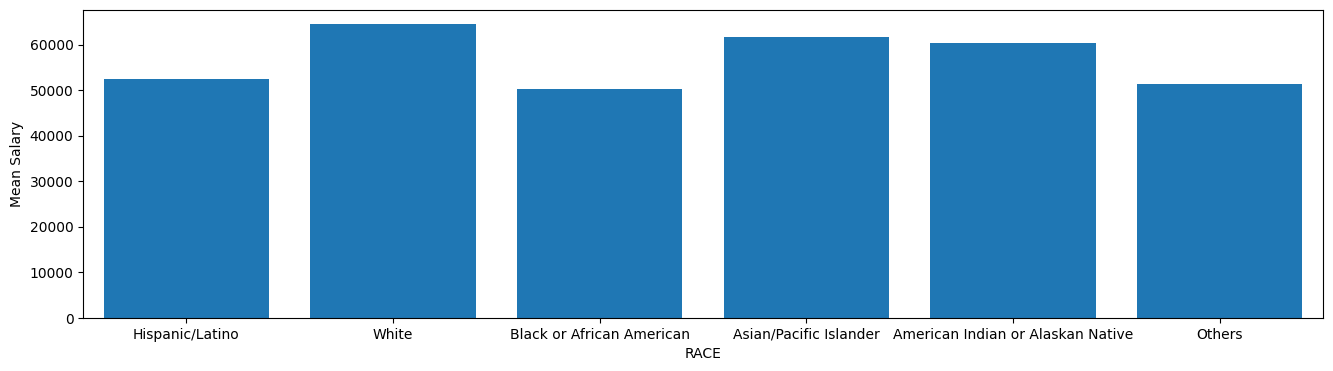

In [ ]:
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary')

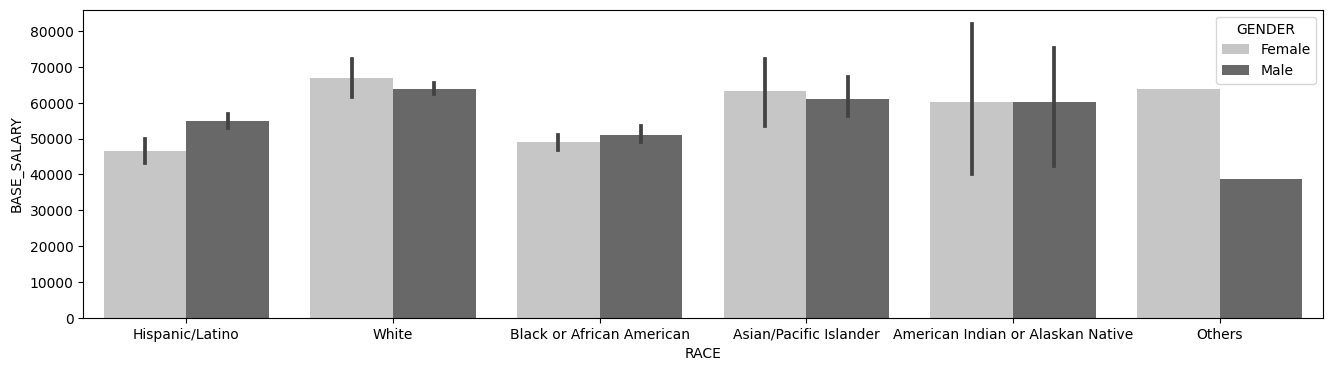

In [ ]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

<Axes: xlabel='RACE'>

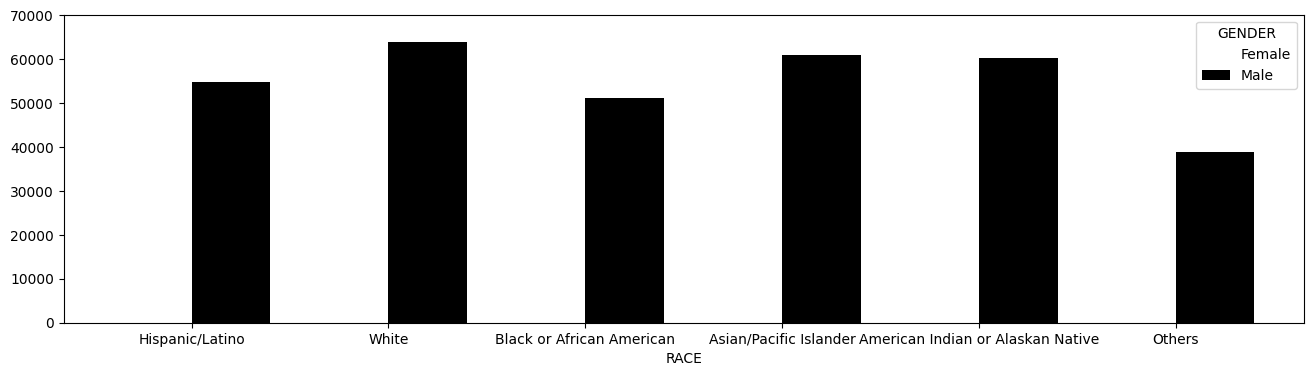

In [ ]:
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'] \
        .mean().unstack('GENDER') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

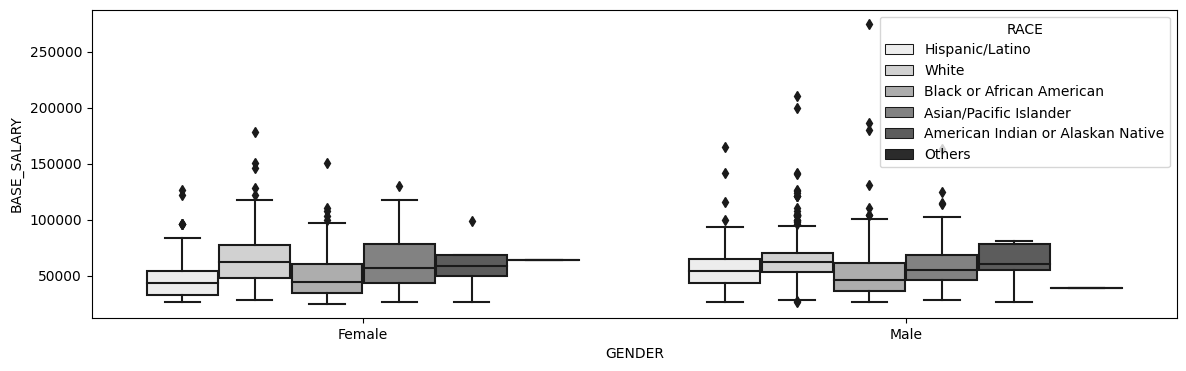

In [ ]:
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

Text(0.5, 0.98, '')

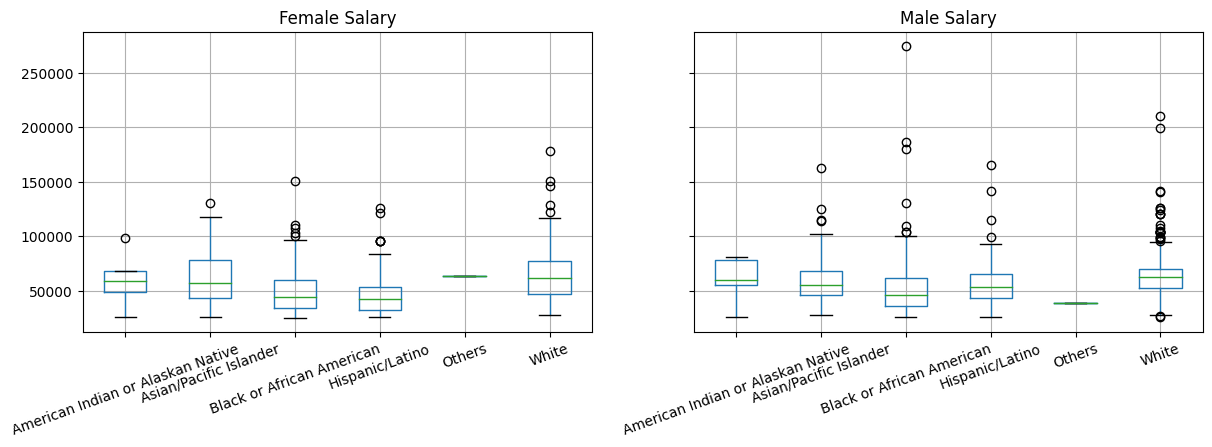

In [ ]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
            .boxplot(by='RACE', column='BASE_SALARY', ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

Text(0.5, 0.98, '')

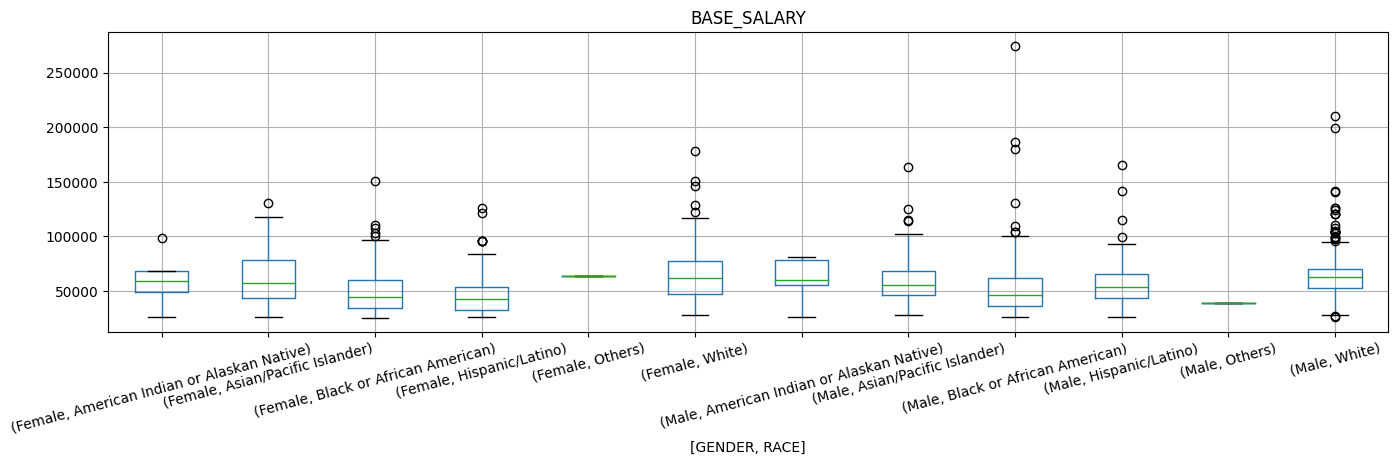

In [ ]:
ax = employee.boxplot(by=['GENDER', 'RACE'],
                      column='BASE_SALARY',
                      figsize=(16,4), rot=15)
ax.figure.suptitle('')

# Scikit-learn Components

## Linear regression

This section covers basic machine learning concepts using scikit-learn, focusing on linear and logistic regression.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets


# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Create a DataFrame from the features
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Optionally, add the target variable to the DataFrame
df['target'] = diabetes.target

df.head()




In [ ]:
# Splitting the data into training and testing sets

X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [ ]:
# The coefficients
print("Coefficients: \n", model.coef_)
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Coefficients: 
 [ -35.55025079 -243.16508959  562.76234744  305.46348218 -662.70290089
  324.20738537   24.74879489  170.3249615   731.63743545   43.0309307 ]
Mean Squared Error: 3424.259334298692


## Logistic regression

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [ ]:
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features
y = (iris.target != 0) * 1  # Binary target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Creating the logistic regression model
model = LogisticRegression()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.0
Confusion Matrix:
[[11  0]
 [ 0 19]]
